In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [3]:
bike_sharing_data = pd.read_csv('datasets/day.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_data.shape

(731, 16)

In [5]:
# Workingday and Temperature on number of bikes rented is significant 
# or not
bike_sharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
bike_sharing_data_cols = bike_sharing_data[['season', 'mnth', 'holiday',
       'workingday', 'weathersit', 'temp', 'cnt']]

In [8]:
# saving into a csv file
bike_sharing_data_cols.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [9]:
bike_sharing_data_cols.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [10]:
bike_sharing_data_cols.describe()

,season,mnth,holiday,workingday,weathersit,temp,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,0.683995,1.395349,0.495385,4504.348837
std,1.110807,3.451913,0.167155,0.465233,0.544894,0.183051,1937.211452
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.059130,22.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.337083,3152.000000
50%,3.000000,7.000000,0.000000,1.000000,1.000000,0.498333,4548.000000
75%,3.000000,10.000000,0.000000,1.000000,2.000000,0.655417,5956.000000
max,4.000000,12.000000,1.000000,1.000000,3.000000,0.861667,8714.000000


In [12]:
bike_sharing_data_cols['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
bike_sharing_data_cols['season'].unique()

array([1, 2, 3, 4])

In [14]:
bike_sharing_data_cols['holiday'].unique()

array([0, 1])

In [15]:
bike_sharing_data_cols['workingday'].unique()

array([0, 1])

In [16]:
bike_sharing_data_cols['temp'].unique()

array([0.344167 , 0.363478 , 0.196364 , 0.2      , 0.226957 , 0.204348 ,
       0.196522 , 0.165    , 0.138333 , 0.150833 , 0.169091 , 0.172727 ,
       0.16087  , 0.233333 , 0.231667 , 0.175833 , 0.216667 , 0.292174 ,
       0.261667 , 0.1775   , 0.0591304, 0.0965217, 0.0973913, 0.223478 ,
       0.2175   , 0.195    , 0.203478 , 0.216522 , 0.180833 , 0.192174 ,
       0.26     , 0.186957 , 0.211304 , 0.285833 , 0.271667 , 0.220833 ,
       0.134783 , 0.144348 , 0.189091 , 0.2225   , 0.316522 , 0.415    ,
       0.266087 , 0.318261 , 0.435833 , 0.521667 , 0.399167 , 0.285217 ,
       0.303333 , 0.182222 , 0.221739 , 0.295652 , 0.364348 , 0.2825   ,
       0.343478 , 0.407273 , 0.266667 , 0.335    , 0.198333 , 0.384167 ,
       0.376522 , 0.261739 , 0.2925   , 0.295833 , 0.389091 , 0.329167 ,
       0.384348 , 0.325217 , 0.317391 , 0.365217 , 0.54     , 0.4725   ,
       0.3325   , 0.430435 , 0.441667 , 0.346957 , 0.285    , 0.264167 ,
       0.265833 , 0.253043 , 0.264348 , 0.3025   , 

In [17]:
bike_sharing_data_cols['weathersit'].unique()

array([2, 1, 3])

In [18]:
bike_sharing_data_cols['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [20]:
 bike_sharing_data_cols.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

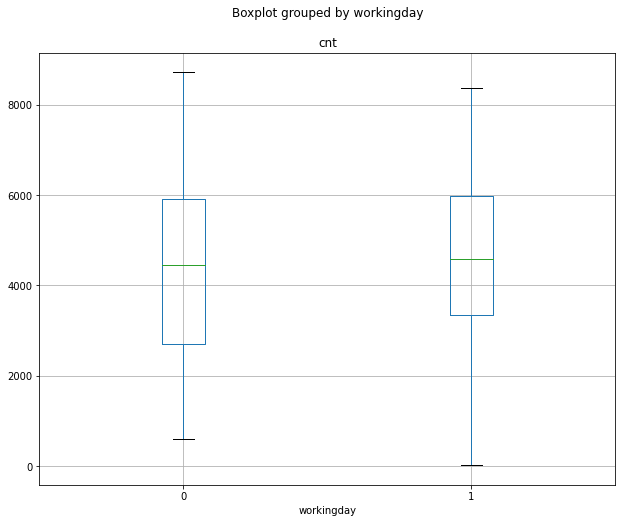

In [22]:
bike_sharing_data_cols.boxplot(column=['cnt'], by='workingday', figsize=(10,8))

In [26]:
# for working day
sample_01 = bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 1)]

# for non-working day
sample_02 = bike_sharing_data_cols[(bike_sharing_data_cols['workingday'] == 0)]

In [27]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))